In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('E:/Dima/PhD/Papers/data/verify_results/p1_gt.csv')

In [ ]:
# gt

In [44]:
th1 = 0.7
th2 = 0.2
df = pd.read_csv('E:/Dima/PhD/Papers/data/verify_results/p1_gt.csv')
df_p1 = df[df.ap_val>th1]
df_not_p1 = df[df.ap_val<=th1]
df_p2 = df_not_p1[df_not_p1.ap_val <th2]

p1_rate_gt = df_p1.shape[0]/df.shape[0]
p2_rate_gt = df_p2.shape[0]/df_not_p1.shape[0]
print("p1_rate_gt = {}".format(p1_rate_gt))
print("p2_rate_gt = {}".format(p2_rate_gt))


In [73]:
df.shape

(580741, 4)

In [81]:
list(df[df.token_id == 1].ap_val)[0]

0.11576951295137405

In [42]:
df_p1.shape

(70763, 4)

In [43]:
df_p1.shape[0]/df.shape[0]

0.12184949917433073

In [45]:
df_p2.shape[0]/df_not_p1.shape[0]

0.1836804724909702

In [46]:
df_p2.head()

token_id    ap_val ap_name sim
1          1  0.115770    conf  gt
4          4  0.152760    conf  gt
14        14  0.131086    conf  gt
25        25  0.167979    conf  gt
36        36  0.149104    conf  gt

(array([14065., 14507., 14647., 14665., 15109., 15182., 15749., 17184.,
        19839., 28392.]),
 array([0.70000046, 0.7300002 , 0.75999994, 0.78999968, 0.81999942,
        0.84999916, 0.8799989 , 0.90999864, 0.93999838, 0.96999812,
        0.99999785]),
 <a list of 10 Patch objects>)

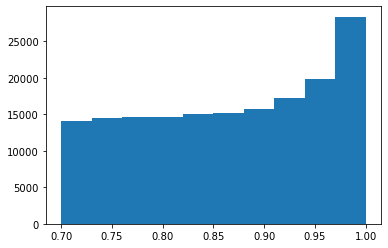

In [35]:
#%matplotlib inline
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np
# counts, bins = np.histogram(df_p1.ap_val)
# plt.hist(bins[:-1], bins, weights=counts)

In [34]:
plt.show()

In [50]:
elements_num = 580741

In [67]:
tmp = list(range(0, elements_num))

In [68]:
len(tmp)

580741

In [62]:
import random
random.seed(42)
random.shuffle(tmp)



In [69]:
tmp_rand = tmp.copy()

In [70]:
random.shuffle(tmp_rand)

In [71]:
tmp_rand[0:10]

[566097, 421197, 572538, 448409, 159563, 561570, 76215, 98006, 318467, 188728]

In [72]:
tmp[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# sim

In [83]:
import h5py

In [84]:
g = h5py.File('E:\Dima\PhD\Papers\data\states\states_model_60_4_80_500_char_prob.h5py', 'r')

In [88]:
g['p_1'][()]

array([0.316, 0.268, 0.162, 0.199, 0.192, 0.605, 0.245, 0.172, 0.084,
       0.146, 0.129, 0.335, 0.399, 0.354, 0.393, 0.275, 0.394, 0.789,
       0.156, 0.727, 0.288, 0.957, 0.835, 0.175, 0.805, 0.349, 0.348,
       0.798, 0.79 , 0.139, 0.287, 0.967, 0.162, 0.26 , 0.149, 0.32 ,
       0.679, 0.215, 0.74 , 0.657, 0.329, 0.576, 0.229, 0.275, 0.221,
       0.692, 0.598, 0.711, 0.705, 0.129], dtype=float32)

In [89]:
sum(g['p_1'][()])

20.724999986588955

# Memorization 

In [95]:
file_memorization = 'E:\Dima\PhD\Papers\data\states\states_model_60_4_80_500_char_prob_for_memorization.h5py'
tokens_file = 'E:/Dima/PhD/Papers/data/states/tokens_index_model_60_4_80_500.csv'

In [93]:
import h5py
import pandas as pd

In [267]:
m = h5py.File(file_memorization, 'r')

df_tokens = pd.read_csv(tokens_file)

df_tokens.head()

id                                              token
0   0  preface   supposing that truth is a womanwhat ...
1   1  reface   supposing that truth is a womanwhat t...
2   2  eface   supposing that truth is a womanwhat th...
3   3  face   supposing that truth is a womanwhat the...
4   4  ace   supposing that truth is a womanwhat then...

In [103]:
k = 0
prob_list = []
for elem_id, row in df_tokens.iterrows():
    elem = row[1]  # long term string
    prob_list.append(m['p_' + str(elem_id)][()])
    
    k = k + 1
    if k % 1000 == 0:
        print("elem = {}. k = {}.".format(elem, k))

elem = ces as the dogmatists have hitherto reared perhaps. k = 1000.
elem = edanta doctrine in asia and platonism in europe le. k = 2000.
elem = e against the ecclesiastical oppression of millenn. k = 3000.
elem =  knows the goal to aim at  sils maria upper engadi. k = 4000.
elem = ented itself before usor was it we who presented o. k = 5000.
elem = e intransitory in the concealed god in the thingin. k = 6000.
elem = es as it were to borrow an expression current amon. k = 7000.
elem = ers and having read between their lines long enoug. k = 8000.
elem = valuations special kinds of _niaiserie_ such as ma. k = 9000.
elem =  manner and a philosophy which ventures to do so h. k = 10000.
elem = erally astute defenders also of their prejudices w. k = 11000.
elem = sonal timidity and vulnerability does this masquer. k = 12000.
elem = l practiced philosophy at one time or another and . k = 13000.
elem = r that in the philosopher on the contrary there is. k = 14000.
elem =  garden at athens and 

In [104]:
len(prob_list)

580741

In [142]:
len_seq = 50

In [184]:
prob_list = prob_list[:-len_seq]

_ = np.concatenate( prob_list, axis=0 )

_ = _.reshape(-1,len_seq)

df = pd.DataFrame(_)

tmp = df.copy()

tmp.head()

In [258]:
tmp[df<0.99]=0

tmp[df>=0.99]=1

tmp_memorization_cnt = tmp.sum(axis=1)

tmp_memorization_cnt.value_counts()

In [259]:
tmp_memorization_cnt[tmp_memorization_cnt>=4]

66        5.0
67        5.0
68        5.0
74        5.0
75        6.0
         ... 
580371    4.0
580375    6.0
580380    4.0
580385    4.0
580390    5.0
Length: 2029, dtype: float32

In [260]:
print("Cases of extreme memorization = {}".format(len(tmp_memorization_cnt[tmp_memorization_cnt>=4])))

Cases of extreme memorization = 2029


In [262]:
len(tmp_memorization_cnt[tmp_memorization_cnt>=4])/df_tokens.shape[0]*100

0.3493812215772608

In [263]:
df_tokens[df_tokens.id == id].token.values[0]

'that we want the truth why not rather untruth and '

In [266]:
100-0.349

99.651

In [ ]:
tmp_memorization_cnt[tmp_memorization_cnt==0]

In [247]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def colorize(words, color_array):
    # words is a list of words
    # color_array is an array of numbers between 0 and 1 of length equal to words
    cmap = matplotlib.cm.get_cmap('GnBu') #('GnBu')
    template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
    colored_string = ''
    for word, color in zip(words, color_array):
        color = matplotlib.colors.rgb2hex(cmap(color)[:3])
        colored_string += template.format(color, '&nbsp' + word + '&nbsp')
    return colored_string
    
# words = 'The quick brown fox jumps over the lazy dog'.split()
# color_array = np.random.rand(len(words))
# s = colorize(words, color_array)

# # to display in ipython notebook
# from IPython.display import display, HTML
# display(HTML(s))


In [264]:
for i in tmp_memorization_cnt[tmp_memorization_cnt>=4].index:
    #print(i)
    id = i
#     print("".format(df_tokens[df_tokens.id == id].token.values))
    #print(df.iloc[id])
    str_list = list(df_tokens[df_tokens.id == id].token.values[0])
    str_color = list(df.iloc[id])
    s = colorize(str_list, str_color)
    from IPython.display import display, HTML
    display(HTML(s))

KeyboardInterrupt: 

In [ ]:
s = colorize(words, color_array)

In [211]:
color_array

array([0.51504876, 0.57975082, 0.45032035, 0.89665819, 0.84937659,
       0.36563662, 0.74995309, 0.92915918, 0.9892966 ])

In [216]:
s = colorize(['cat', ' sat', ' mat'], [0.0, 0.92915918, 0.9892966])
from IPython.display import display, HTML
display(HTML(s))


In [221]:
str_list = list('y a philosopher if there could be philosophers now')

In [223]:
len(str_list)

50

In [229]:
id = 206334
print(df_tokens[df_tokens.id == id].token.values)
print(list(df.iloc[id]))
str_list = list('y a philosopher if there could be philosophers now')
str_color = list(df.iloc[id])
s = colorize(str_list, str_color)
from IPython.display import display, HTML
display(HTML(s))

['y a philosopher if there could be philosophers now']
[0.7670000195503235, 0.14900000393390656, 0.3089999854564667, 0.15800000727176666, 0.27399998903274536, 0.36000001430511475, 0.35899999737739563, 0.8849999904632568, 0.9570000171661377, 0.984000027179718, 0.9649999737739563, 0.9829999804496765, 0.4449999928474426, 0.9369999766349792, 0.3779999911785126, 0.19300000369548798, 0.41999998688697815, 0.9520000219345093, 0.2329999953508377, 0.9269999861717224, 0.8769999742507935, 0.3959999978542328, 0.7559999823570251, 0.7239999771118164, 0.16500000655651093, 0.23499999940395355, 0.1770000010728836, 0.5550000071525574, 0.9570000171661377, 0.6840000152587891, 0.10000000149011612, 0.32899999618530273, 0.45399999618530273, 0.19200000166893005, 0.24500000476837158, 0.3319999873638153, 0.953000009059906, 0.8569999933242798, 0.9959999918937683, 0.9980000257492065, 0.9879999756813049, 0.9760000109672546, 0.7789999842643738, 0.9330000281333923, 0.4020000100135803, 0.7200000286102295, 0.1110000014

In [199]:
id = 51396
print(df_tokens[df_tokens.id == id].token.values)
print(df.iloc[id])

[' philosopher that the sense of philosophical humou']
0     0.412
1     0.234
2     0.378
3     0.341
4     0.976
5     0.648
6     0.995
7     0.996
8     0.999
9     0.633
10    0.991
11    0.395
12    0.139
13    0.615
14    0.609
15    0.729
16    0.992
17    0.221
18    0.827
19    0.621
20    0.906
21    0.120
22    0.166
23    0.155
24    0.173
25    0.336
26    0.746
27    0.218
28    0.905
29    0.986
30    0.156
31    0.301
32    0.247
33    0.513
34    0.975
35    0.348
36    0.995
37    0.976
38    0.811
39    0.468
40    0.124
41    0.415
42    0.966
43    0.522
44    0.101
45    0.374
46    0.392
47    0.245
48    0.432
49    0.264
Name: 51396, dtype: float32


In [197]:
id = 353551
print(df_tokens[df_tokens.id == id].token.values)
print(df.iloc[id])

['hat a philosophersupposing that a philosopher has ']
0     0.588
1     0.221
2     0.219
3     0.168
4     0.574
5     0.108
6     0.179
7     0.354
8     0.555
9     0.675
10    0.907
11    0.790
12    0.999
13    1.000
14    0.524
15    0.972
16    0.391
17    0.674
18    0.438
19    0.718
20    0.201
21    0.270
22    0.524
23    0.425
24    0.948
25    0.965
26    0.166
27    0.746
28    0.714
29    0.966
30    0.991
31    0.149
32    0.408
33    0.090
34    0.181
35    0.378
36    0.964
37    0.961
38    0.984
39    0.914
40    0.972
41    1.000
42    0.392
43    0.919
44    0.488
45    0.178
46    0.405
47    0.346
48    0.840
49    0.116
Name: 353551, dtype: float32


In [198]:
id = 176327
print(df_tokens[df_tokens.id == id].token.values)
print(df.iloc[id])

['ve heard about philosophy and philosophers from yo']
0     0.221
1     0.157
2     0.116
3     0.319
4     0.540
5     0.566
6     0.525
7     0.665
8     0.118
9     0.245
10    0.276
11    0.535
12    0.794
13    0.532
14    0.263
15    0.270
16    0.292
17    0.965
18    0.976
19    0.853
20    0.985
21    0.996
22    0.980
23    0.607
24    0.582
25    0.152
26    0.362
27    0.880
28    0.995
29    0.106
30    0.334
31    0.339
32    0.995
33    0.989
34    0.995
35    0.992
36    0.977
37    0.995
38    0.523
39    0.589
40    0.291
41    0.757
42    0.249
43    0.284
44    0.466
45    0.365
46    0.975
47    0.201
48    0.635
49    0.231
Name: 176327, dtype: float32
